# Phospholipid monolayer example

A more complex example of model reparameterisation is that of a phospholipid monolayer, were the reparameterisation of our model allows additional constraints to be included that would be very difficult to apply in a traditional slab model approach. 
The amphiphilic nature of a phospholipid molecule, which consists of a water-soluble head group and insoluble, hydrocarbon tail group, means that these molecules will **self-assemble** at the air-water interface. 

For a typical phospholipid, such as [DPPC](https://en.wikipedia.org/wiki/Dipalmitoylphosphatidylcholine), there are two tail strands attached to each head and these tails typically sit with some chain tilt angle, $\theta$, which depends on the pressure acting on the tail groups in the $xy$-plane {cite}`campbell_structure_2018`. 
This pressure effects the density of the phospholipids at the interface, also known as the area per molecule, $\mathrm{APM}$, with higher pressures causing a higher density. 
The slab model description of this system is shown in {numref}`monolayer`.

```{figure} ../figures/monolayer.png
---
height: 300px
align: center
name: monolayer
---
A pictorial example of the phospholipid monolayer system, showing the chain tilt angle, $\theta$. 
```

## Chain tilt angle

A common reparameterisation approach for the modelling of a phospholipid monolayer is to make the assumption that **the hydrocarbon tail will be fully extended**.
Wwe can use the Tanford length {cite}`tanford_hydrophobic_1980` to find the length of this fully extended tail, $t_t$, 

$$
t_t = 1.5 + 1.265n_c [\mathrm{Å}], 
$$

````{margin}
```{note}
The thickness is found from $d_t = t_t\sin\theta$. 
```
````
where $n_c$ is the number of carbon atoms in the chain. 
This allows simple trigonometry to be used to calculate the thickness of the tail layer. 
This approach has the benefit of a limiting the maximum thickness to when $\theta=90^\circ$. 
Below, we plot $d_h$ as a function of $\theta$ for a DPPC molecule tail group.

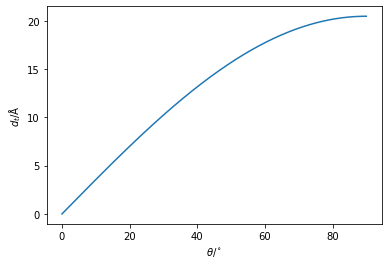

In [5]:
import numpy as np
import matplotlib.pyplot as plt

t_t = 1.5 + 1.265 * 15
angle = np.linspace(0, 90, 1000)
plt.plot(angle, t_t * np.sin(np.deg2rad(angle)))
plt.xlabel(r'$\theta$/$^\circ$')
plt.ylabel('$d_t$/Å')
plt.show()

## Area per molecule

In addition to the constraint introduced by considering a fully extended hydrocarbon tail, it is also possible to add the physical constraint that we must have one head group for every two tails groups in our systems. 
This is acheived by having a single area per molecule, $\mathrm{APM}$, value for the system and using this to define the scattering length density, $\beta$ of each of the layers. 
The scattering length density for one of the layers, $i$, can be defined as follows, in terms of the $\mathrm{APM}$,

$$
\beta_i = \frac{\sum_{i=0}^{N}b_i}{d_i \mathrm{APM}} (1 - \phi_i) + \beta_{\mathrm{s}}\phi_i,
$$

where, $d_i$ is the layer thickness, $\phi_i$ is the fractional solvation of the layer, by the solvent $\mathrm{s}$, with scattering length density, $\beta_{\mathrm{s}}$. 

The use of $\mathrm{APM}$ reduces the number of parameters in the model, given that now both $\beta_{\mathrm{heads}}$ and $\beta_{\mathrm{tails}}$ are constrained by other parameters in the model and only $\mathrm{APM}$ has been added. 
It should be noted that the solvation of a layer is a common approach for monlayer systems, as the hydrophilic head group layer will be very likely to have some composition of the solvent intercalated. 
For the tail group layer, $\phi_i$ is typically assumed to be $0$, as it is unlikely that solvent would intercalate into this hydrophobic region {cite}`mccluskey_bayesian_2019`. 